# IRIS DECISION TREE MODEL

Import libraries

In [39]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier, export_graphviz , plot_tree
import pydotplus 
from sklearn.model_selection import train_test_split
from sklearn import metrics


Read csv file

In [8]:
data = pd.read_csv('iris.csv')
df= data.copy()

understanding data

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [15]:
data['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

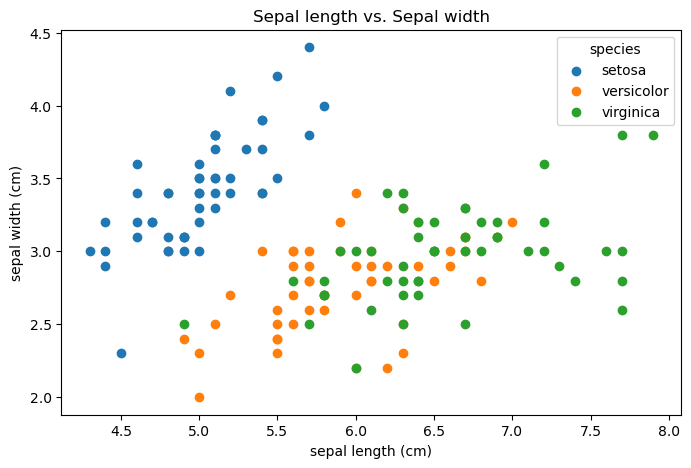

In [50]:
# visualize the species lenght and width 
plt.figure(figsize=(8,5))
for species , species_data in data.groupby('species'):
    plt.scatter(species_data['sepal_length'],species_data['sepal_width'],label=species)

plt.title('Sepal length vs. Sepal width')
plt.legend(title='species')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

In [ ]:
# define feature and target value
x = df.drop('species',axis=1)
y = df['species']


In [ ]:
# split the data for training and testing
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [ ]:
# train model
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
# predict target
y_pred = model.predict(x_test)

In [51]:
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [ ]:
# Evalute model
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average='weighted')
recall = metrics.recall_score(y_test , y_pred, average='weighted')
f1_score = metrics.f1_score(y_test,y_pred,average='weighted')

print(f'accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'f1_score: {f1_score:.2f}')

accuracy: 1.00
Precision: 1.00
Recall: 1.00
f1_score: 1.00


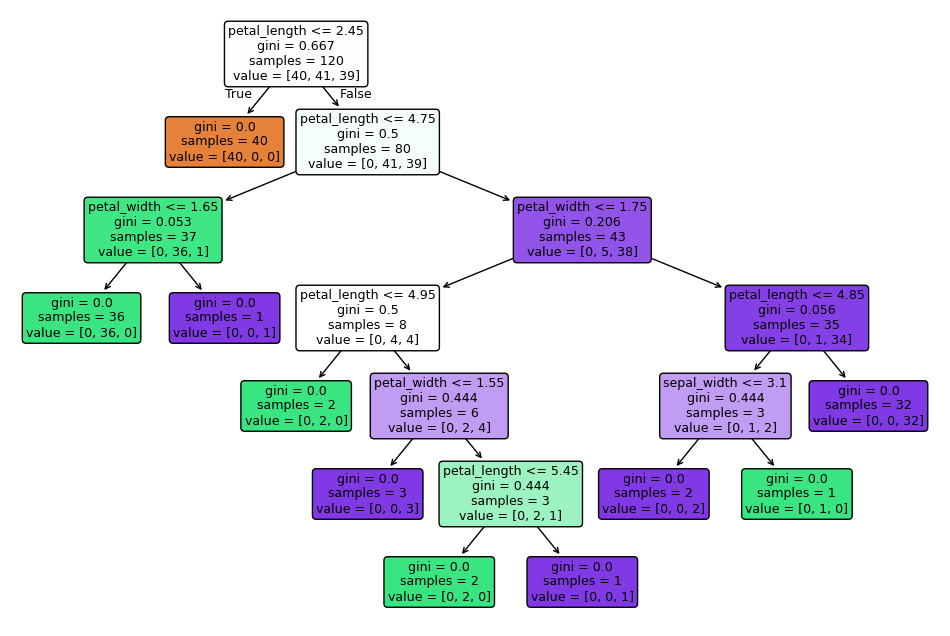

In [46]:
# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(model, 
          feature_names=x_train.columns, 
          # Customize as needed
          filled=True, 
          rounded=True)
plt.show()

# Conclusion: Iris Decision Tree Classification
The decision tree model successfully classified the Iris dataset with perfect accuracy, precision, recall, and F1 score — all scoring 1.00. 
This indicates that the model made no errors on the test set and captured the underlying patterns in the data exceptionally well.
The tree structure reveals that petal length and petal width are the most decisive features in distinguishing between Iris species. The model’s interpretability, combined with its high performance, makes it an ideal candidate for educational and business-facing applications where transparency is key.
This project demonstrates the power of decision trees for classification tasks and highlights the importance of feature selection and visualization in communicating model logic to non-technical audiences.
